# Purpose

1. 흐릿한 점을 주변의 명확한 사진(노드)로 추론해보는것,

    - 소프트맥스로 나온 결과가 애매한 것들
    
2. 노드로 인식하고 극중 상황을 추론하는 (싸움/긴장 등)

1. 흐릿한 이미지 -> 추정

- 데이터 구하는 것이 어려움

2. Object detection -> 관계추정

3. Multi-label -> 관계추정

- 비슷한 이미지로 분류

# Import

In [65]:
import skimage
import numpy as np
from PIL import Image
import requests
import torch
from transformers import pipeline

In [66]:
import numpy as np
import os
from PIL import Image, ImageDraw

In [73]:
from datasets import load_dataset

# graph

In [40]:
cppe5 = load_dataset("cppe-5")

In [41]:
data_dict = {}
for z in range(len(cppe5['train'])) :
    image = cppe5["train"][z]["image"]
    annotations = cppe5["train"][z]["objects"]
    draw = ImageDraw.Draw(image)

    categories = cppe5["train"].features["objects"].feature["category"].names

    id2label = {index: x for index, x in enumerate(categories, start=0)}
    label2id = {v: k for k, v in id2label.items()}
    
    # for i in range(len(annotations["id"])):
    #     box = annotations["bbox"][i - 1]
    #     class_idx = annotations["category"][i - 1]
    #     x, y, w, h = tuple(box)
    #     draw.rectangle((x, y, x + w, y + h), outline="red", width=1)
    #     draw.text((x, y), id2label[class_idx], fill="white")

#     edge_matrix = np.zeros((len(categories), len(categories)), dtype=int)

#     for i in range(len(annotations['category'])-1):
#         edge_matrix[annotations['category'][i],annotations['category'][i+1]] = 1

#     edge_list = []

    # for i in range(edge_matrix.shape[0]):
    #     for j in range(edge_matrix.shape[1]):
    #         if edge_matrix[i, j] == 1:
    #             edge_list.append([i, j])
                
    data_dict[z] = {
        "image": image,
        "annotations": annotations,
        # "edge_matrix": edge_matrix,
        # "edge_list": edge_list
    }

In [42]:
data_dict[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=943x663>,
 'annotations': {'id': [114, 115, 116, 117],
  'area': [3796, 1596, 152768, 81002],
  'bbox': [[302.0, 109.0, 73.0, 52.0],
   [810.0, 100.0, 57.0, 28.0],
   [160.0, 31.0, 248.0, 616.0],
   [741.0, 68.0, 202.0, 401.0]],
  'category': [4, 4, 0, 0]}}

In [44]:
cppe5['train'].features['objects']

Sequence(feature={'id': Value(dtype='int64', id=None), 'area': Value(dtype='int64', id=None), 'bbox': Sequence(feature=Value(dtype='float32', id=None), length=4, id=None), 'category': ClassLabel(names=['Coverall', 'Face_Shield', 'Gloves', 'Goggles', 'Mask'], id=None)}, length=-1, id=None)

# coco data

https://huggingface.co/datasets?task_categories=task_categories:object-detection&sort=trending

In [25]:
a = load_dataset('nateraw/kitti')

























Generating test split: 100%|██████████| 7518/7518 [00:25<00:00, 289.69 examples/s]


In [26]:
a

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 7481
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 7518
    })
})

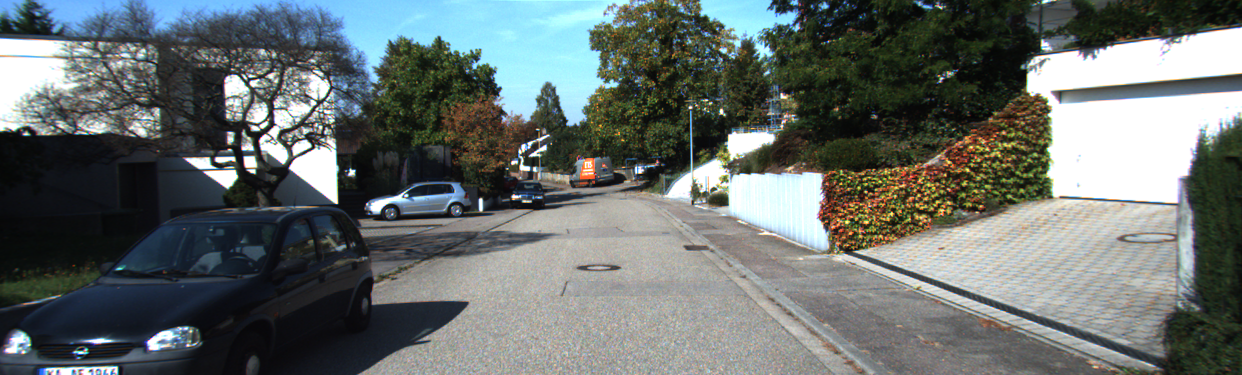

In [27]:
a['train']['image'][0]

In [28]:
a['train']['label'][0]

[{'alpha': 2.05,
  'bbox': [0.0, 201.91, 381.56, 374.0],
  'dimensions': [1.39, 1.52, 3.56],
  'location': [-3.46, 1.72, 6.53],
  'occluded': 3,
  'rotation_y': 1.58,
  'truncated': 0.29,
  'type': 'Car'},
 {'alpha': 1.64,
  'bbox': [509.57, 181.27, 547.51, 209.33],
  'dimensions': [1.34, 1.64, 4.57],
  'location': [-4.19, 1.79, 37.41],
  'occluded': 0,
  'rotation_y': 1.53,
  'truncated': 0.0,
  'type': 'Car'},
 {'alpha': -2.04,
  'bbox': [568.39, 157.37, 615.92, 188.79],
  'dimensions': [2.72, 2.03, 5.4],
  'location': [-1.68, 1.41, 65.23],
  'occluded': 3,
  'rotation_y': -2.07,
  'truncated': 0.0,
  'type': 'Van'},
 {'alpha': 3.01,
  'bbox': [364.62, 180.67, 475.89, 221.2],
  'dimensions': [1.52, 1.41, 4.22],
  'location': [-7.74, 1.87, 29.34],
  'occluded': 0,
  'rotation_y': 2.75,
  'truncated': 0.0,
  'type': 'Car'}]

In [ ]:
data_dict_a = {}
for z in range(len(a['train'])) :
    image = a["train"][z]["image"]
    annotations = a["train"][z]["label"]
    draw = ImageDraw.Draw(image)

    categories =a['train']['label'][0][0]['type']

    id2label = {index: x for index, x in enumerate(categories, start=0)}
    label2id = {v: k for k, v in id2label.items()}
    
    # for i in range(len(annotations["id"])):
    #     box = annotations["bbox"][i - 1]
    #     class_idx = annotations["category"][i - 1]
    #     x, y, w, h = tuple(box)
    #     draw.rectangle((x, y, x + w, y + h), outline="red", width=1)
    #     draw.text((x, y), id2label[class_idx], fill="white")

#     edge_matrix = np.zeros((len(categories), len(categories)), dtype=int)

#     for i in range(len(annotations['category'])-1):
#         edge_matrix[annotations['category'][i],annotations['category'][i+1]] = 1

#     edge_list = []

    # for i in range(edge_matrix.shape[0]):
    #     for j in range(edge_matrix.shape[1]):
    #         if edge_matrix[i, j] == 1:
    #             edge_list.append([i, j])
                
    data_dict_a [z] = {
        "image": image,
        "annotations": annotations,
        # "edge_matrix": edge_matrix,
        # "edge_list": edge_list
    }

In [91]:
data_dict_a[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1242x375>,
 'annotations': [{'alpha': 2.05,
   'bbox': [0.0, 201.91, 381.56, 374.0],
   'dimensions': [1.39, 1.52, 3.56],
   'location': [-3.46, 1.72, 6.53],
   'occluded': 3,
   'rotation_y': 1.58,
   'truncated': 0.29,
   'type': 'Car'},
  {'alpha': 1.64,
   'bbox': [509.57, 181.27, 547.51, 209.33],
   'dimensions': [1.34, 1.64, 4.57],
   'location': [-4.19, 1.79, 37.41],
   'occluded': 0,
   'rotation_y': 1.53,
   'truncated': 0.0,
   'type': 'Car'},
  {'alpha': -2.04,
   'bbox': [568.39, 157.37, 615.92, 188.79],
   'dimensions': [2.72, 2.03, 5.4],
   'location': [-1.68, 1.41, 65.23],
   'occluded': 3,
   'rotation_y': -2.07,
   'truncated': 0.0,
   'type': 'Van'},
  {'alpha': 3.01,
   'bbox': [364.62, 180.67, 475.89, 221.2],
   'dimensions': [1.52, 1.41, 4.22],
   'location': [-7.74, 1.87, 29.34],
   'occluded': 0,
   'rotation_y': 2.75,
   'truncated': 0.0,
   'type': 'Car'}]}

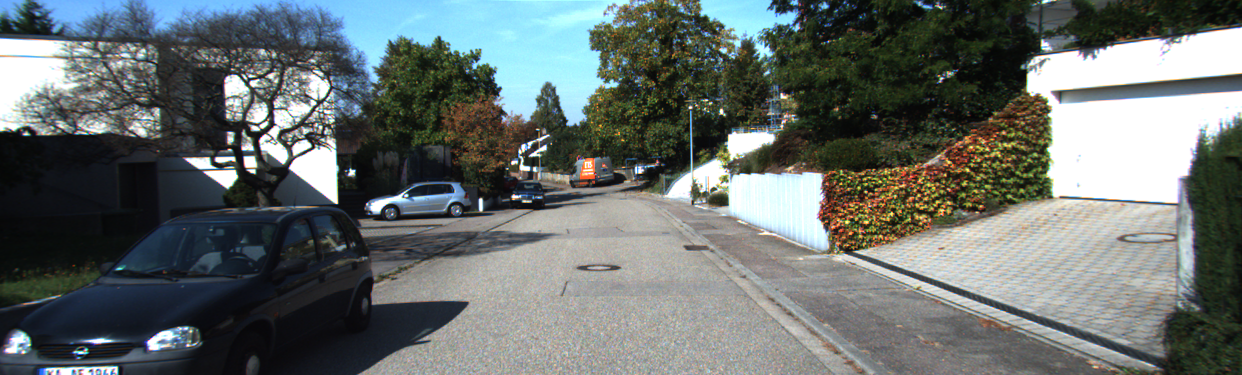

In [94]:
data_dict_a[0]['image']